In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

dfs = []
for exp in Path('experiments/asr').rglob('*metrics.csv'):
    df_i = pd.read_csv(exp)
    df_i['version']=exp.parts[-2].split('_')[-1]
    df_i['exp']=exp.parts[-4]
    dfs.append(df_i)
df = pd.concat(dfs)

Text(0, 0.5, 'Loss')

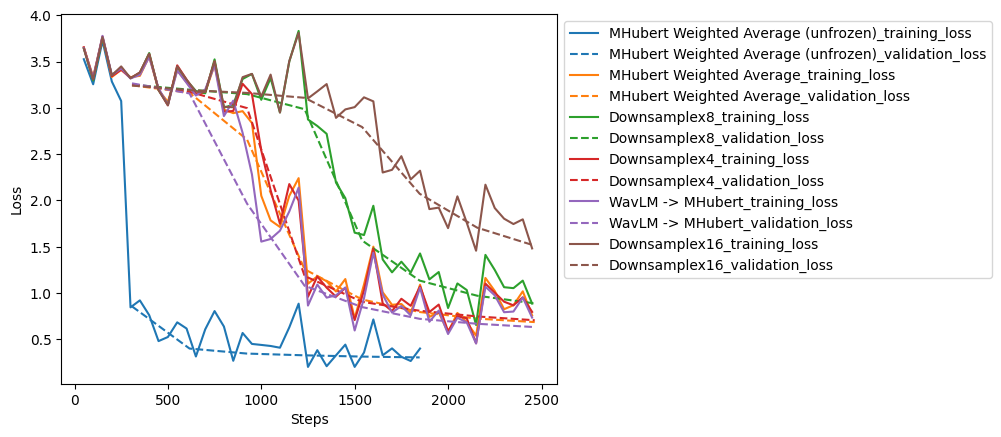

In [2]:
metrics = ['training_loss', 'validation_loss']
exp_rename = {'qwen1.5B-wavlm-catmlp-originalLR-addTedLium-downsample8': 'Downsamplex8',
              'qwen1.5B-wavlm-catmlp-originalLR-addTedLium': 'Downsamplex4',
              'qwen1.5B-wavlm-catmlp-originalLR-addTedLium-downsample16': 'Downsamplex16',
              'qwen1.5B-mhubert-catmlp-originalLR-addTedLium': 'WavLM -> MHubert',
              'qwen1.5B-mhubert-catmlp-originalLR-addTedLium-weightedaverage': 'MHubert Weighted Average',
              'qwen1.5B-mhubert-catmlp-originalLR-addTedLium-weightedaverage-fixnograd': 'MHubert Weighted Average (unfrozen)'}

for exp in df['exp'].unique():
    if exp in exp_rename:
        df_exp = df.loc[df['exp']==exp]
        max_version = df_exp['version'].apply(lambda x: int(x)).max()
        df_exp = df_exp.loc[df_exp['version']==str(max_version)]
        for m in metrics:
            if 'val' in m:
                lastc = plt.gca().lines[-1].get_color()
                fmt = '--'
            else:
                lastc = None
                fmt = '-'
            df_metric = df_exp.loc[~df_exp[m].isna()]
            plt.plot(df_metric['step'], df_metric[m], label=exp_rename[exp]+'_{}'.format(m),color=lastc, ls=fmt)
plt.legend(bbox_to_anchor=(1,1,0,0))
plt.xlabel('Steps')
plt.ylabel('Loss')

In [3]:
df['exp'].unique()

array(['qwen1.5B-wavlm-catmlp',
       'qwen1.5B-mhubert-catmlp-originalLR-addTedLium-weightedaverage',
       'qwen1.5B-wavlm-catmlp-originalLR-addTedLium-downsample8',
       'qwen1.5B-wavlm-catmlp-originalLR-addTedLium',
       'qwen1.5B-mhubert-catmlp-originalLR-addTedLium',
       'qwen1.5B-wavlm-catmlp-originalLR-addTedLium-downsample16',
       'qwen1.5B-wavlm-catmlp-originalLR'], dtype=object)